# Questions to discuss druing this invetigation :
### How does budget impact movie popularity?

### Are higher-budget movies generally more popular than lower-budget movies?

### Is there a significant correlation between original language  and popularity?

### Is the budget changed during time ? and has that affect the popularity?

First let's get our datasets and describe it

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df_movies = pd.read_csv('tmdb_5000_movies.csv')
df_cred = pd.read_csv('tmdb_5000_credits.csv')

**Describe Our Datasets**

In [72]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [73]:
df_cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


***Merge Two Datasets***

In [75]:
df_cred.columns = ['id' ,  'title' , 'cast' , 'crew']
df = df_movies.merge(df_cred , on = "id")

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [78]:
df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


**#drop repeated columns#**

In [85]:
df.drop(['title_y','title_x'], inplace=True, axis=1) 
df = df.rename(columns={"original_title" : "title"})
df.head(1)

,budget,genres,homepage,id,keywords,original_language,title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [87]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'vote_average', 'vote_count',
       'cast', 'crew'],
      dtype='object')

#rename original_title to title 

***create a copy of our Dataset for any possible mistake so the main dataset will not be affected***

In [91]:
df_copy = df

In [93]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   title                 4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

# Q: Popularity and Budget relation for different parameters

## Study the Original Language  and Popularity relation

***1- create dataset***

In [98]:
y = df_copy.groupby('original_language').agg(movie_count=('id', 'size'), mean_popularity=('popularity', 'mean') ).reset_index()

In [100]:
y.head()

,original_language,movie_count,mean_popularity
0,af,1,2.504169
1,ar,2,4.723389
2,cn,12,10.631343
3,cs,2,1.286849
4,da,7,17.663925


**Wriring a functions for plotting:**

In [103]:
def bar_pltot(df_1, x_para, y_para , bar_color , x_label , y_label ,title):
    plt.figure(figsize=(22, 8))
    plt.bar(df_1[x_para],df_1[y_para], color=bar_color)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

def scatter_plot(df_1 , x_para, y_para , point_row , scatter_color , x_label , y_label  ,title):
    plt.figure(figsize=(12, 8))
    plt.scatter(df_1[x_para], df_1[y_para], color= scatter_color, edgecolor='black')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    for i, row in df_1.iterrows():
        plt.text(row[x_para], row[y_para], row[point_row], fontsize=8, ha='right')
    plt.show()
    

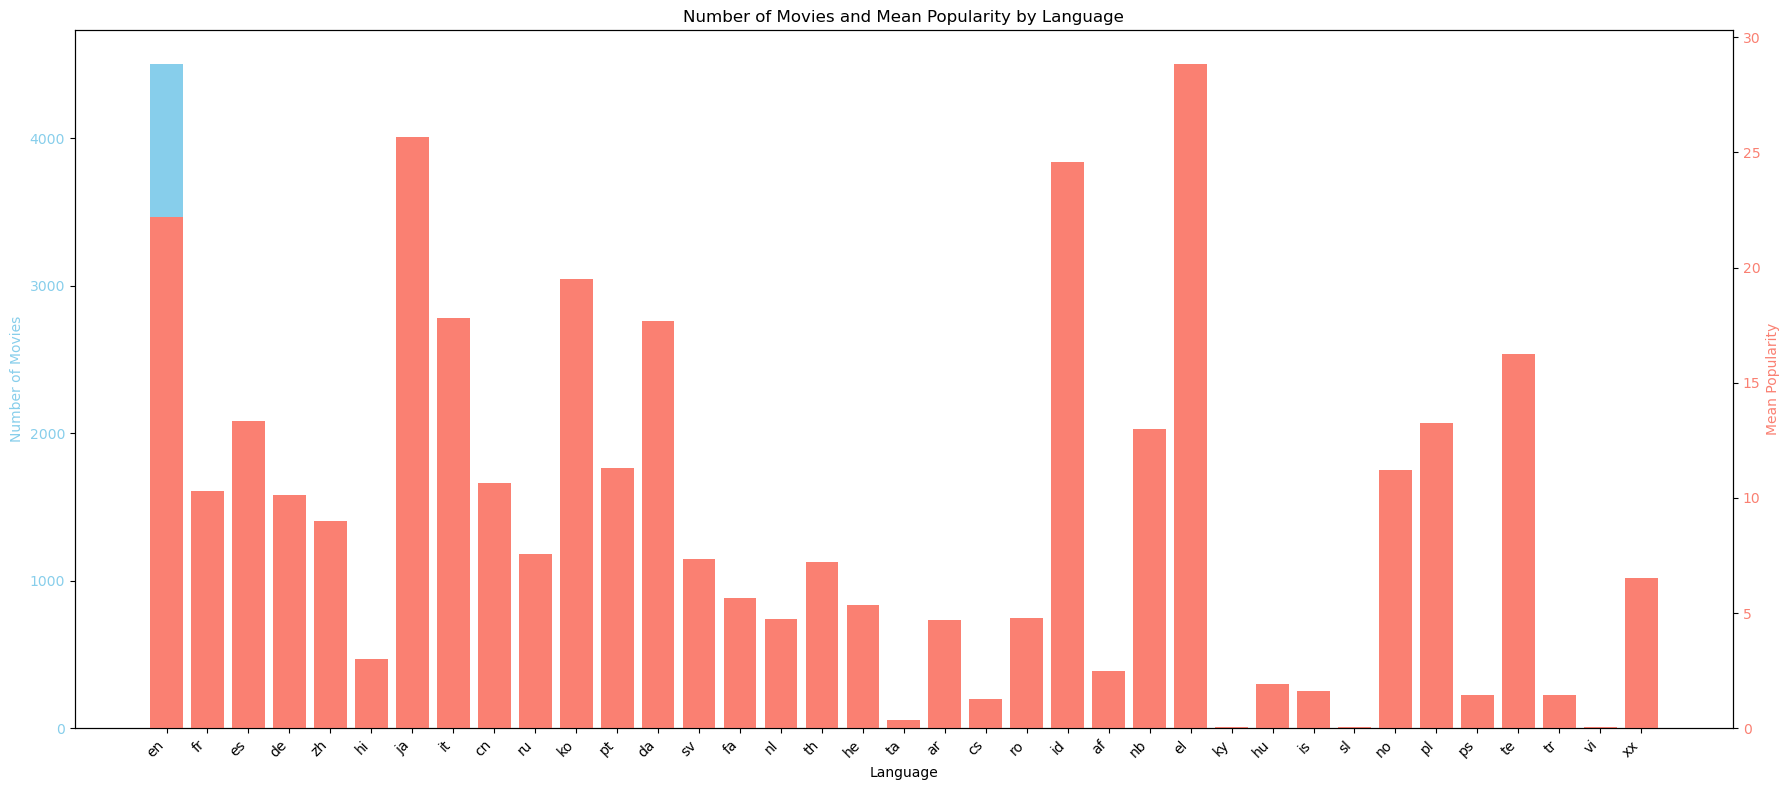

In [105]:
y = y.sort_values(by='movie_count', ascending=False)

fig, ax1 = plt.subplots(figsize=(18, 8))

ax1.bar(y['original_language'],y['movie_count'], color='skyblue', label='Number of Movies')
ax1.set_xlabel('Language')
ax1.set_ylabel('Number of Movies', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xticks(range(len(y['original_language'])))
ax1.set_xticklabels(y['original_language'], rotation=45, ha='right')

ax2 = ax1.twinx()
ax2.bar(y['original_language'], y['mean_popularity'], color='salmon', label='Mean Popularity')
ax2.set_ylabel('Mean Popularity', color='salmon')
ax2.tick_params(axis='y', labelcolor='salmon')

plt.title('Number of Movies and Mean Popularity by Language')
fig.tight_layout()
plt.show()

### Conclusion : some Languages already have popluar movies even with lack number of movies produced 

# Budget Vs Popularity

In [108]:
df_budget_vs_pop = df.groupby(['popularity', 'title', 'production_companies','release_date']).agg(budget_mean=('budget', 'mean')).reset_index().sort_values(by='popularity', ascending=False).head(20)

In [110]:
df_budget_vs_pop.columns

Index(['popularity', 'title', 'production_companies', 'release_date',
       'budget_mean'],
      dtype='object')

In [113]:
df_budget_vs_pop.describe()

,popularity,budget_mean
count,20.000000,2.000000e+01
mean,305.405266,1.464150e+08
std,206.173910,6.313346e+07
min,146.757391,3.300000e+06
25%,167.845580,1.207500e+08
50%,202.888612,1.525000e+08
75%,422.601055,1.700000e+08
max,875.581305,2.500000e+08


In [115]:
df_budget_vs_pop.head()

,popularity,title,production_companies,release_date,budget_mean
4801,875.581305,Minions,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",2015-06-17,74000000.0
4800,724.247784,Interstellar,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",2014-11-05,165000000.0
4799,514.569956,Deadpool,"[{""name"": ""Twentieth Century Fox Film Corporat...",2016-02-09,58000000.0
4798,481.098624,Guardians of the Galaxy,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...",2014-07-30,170000000.0
4797,434.278564,Mad Max: Fury Road,"[{""name"": ""Village Roadshow Pictures"", ""id"": 7...",2015-05-13,150000000.0


In [117]:
df_budget_vs_pop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 4801 to 4782
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            20 non-null     float64
 1   title                 20 non-null     object 
 2   production_companies  20 non-null     object 
 3   release_date          20 non-null     object 
 4   budget_mean           20 non-null     float64
dtypes: float64(2), object(3)
memory usage: 960.0+ bytes


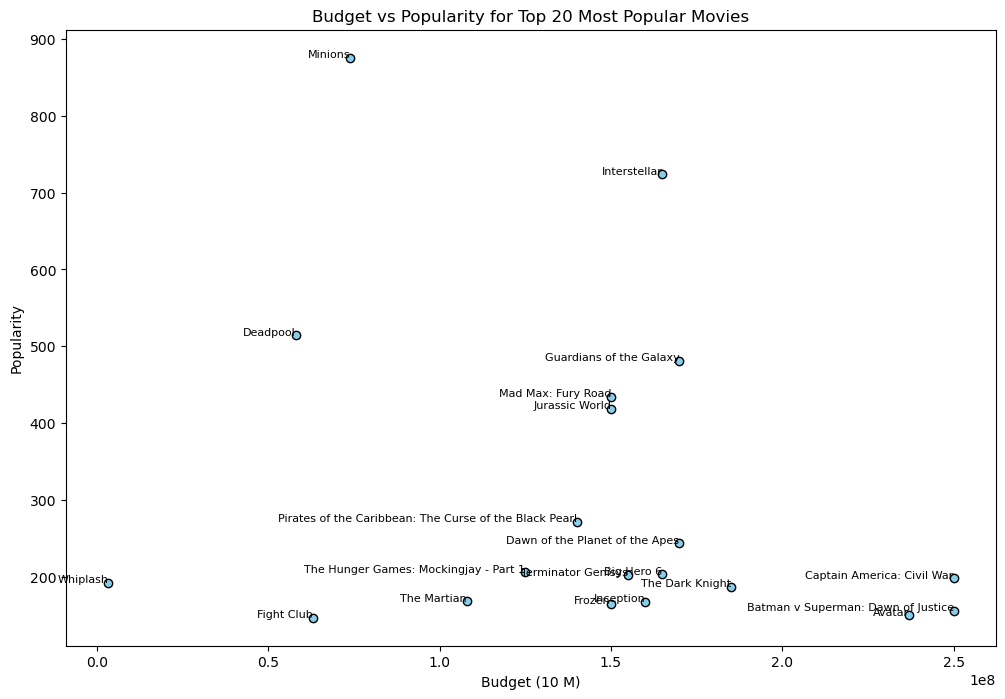

In [119]:
scatter_plot(df_budget_vs_pop , 'budget_mean','popularity' , 'title', 'skyblue' , 'Budget (10 M)' , 'Popularity' ,'Budget vs Popularity for Top 20 Most Popular Movies')

### Conclusion : Budget is not the main cause for movies to be popular , some movie has the highest budget but least popularity 

## Budget Vs Release Date

**Does the budget increased or decreased during time and does that affect the popularity?**

**Let's see the release date for budget and popularity for top 20 movies to get first insights**

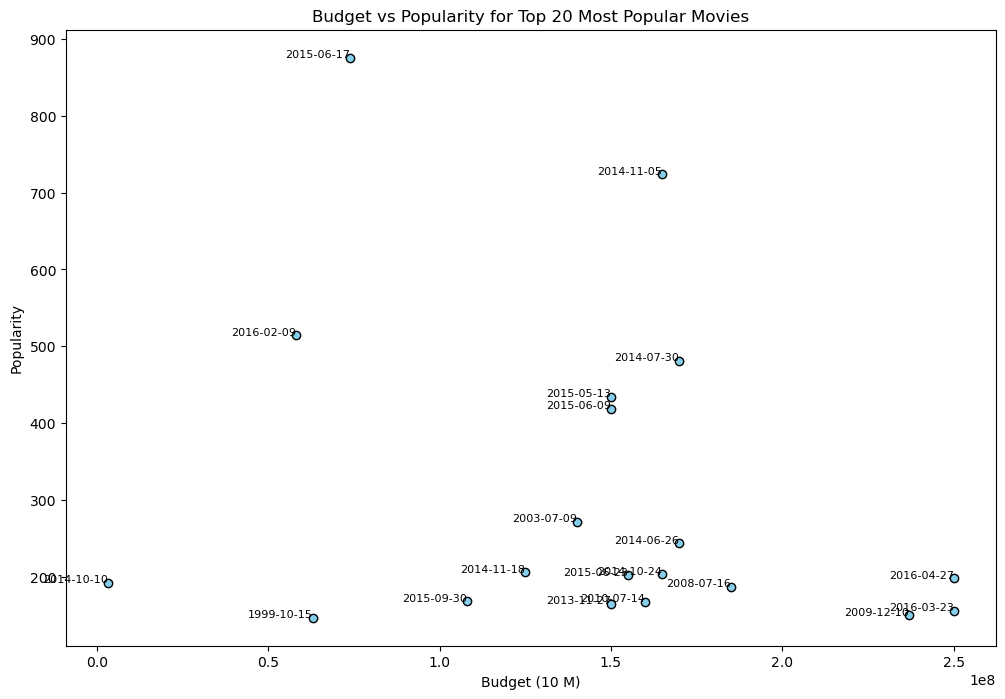

In [125]:
scatter_plot(df_budget_vs_pop , 'budget_mean','popularity' , 'release_date', 'skyblue' , 'Budget (10 M)' , 'Popularity' ,'Budget vs Popularity for Top 20 Most Popular Movies')

## Compare budget according to year of production and popularity

In [128]:
df_copy['release_date'] = pd.to_datetime(df['release_date'])
df_copy['year'] = df_copy['release_date'].dt.year

In [130]:
df_copy.head()

,budget,genres,homepage,id,keywords,original_language,title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count,cast,crew,year
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2009.0
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",2007.0
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",2015.0
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",2012.0
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",2012.0


In [132]:
y4 = df_copy.groupby(['year']).agg(mean_budget=('budget', 'mean'),
    sum_movies=('id', 'sum'),
    mean_popularity=('popularity', 'mean')).reset_index()

In [134]:
y4.head()

,year,mean_budget,sum_movies,mean_popularity
0,1916.0,385907.0,3059,3.232447
1,1925.0,245000.0,3060,0.785744
2,1927.0,92620000.0,19,32.351527
3,1929.0,189500.0,66108,1.396524
4,1930.0,3950000.0,22301,8.484123


In [136]:
y4.tail()

,year,mean_budget,sum_movies,mean_popularity
85,2013.0,3.552329e+07,33331367,28.135912
86,2014.0,3.095989e+07,53287241,37.480126
87,2015.0,3.113216e+07,59825990,37.256857
88,2016.0,4.570327e+07,31105498,37.128692
89,2017.0,0.000000e+00,426469,0.710870


In [138]:
y4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             90 non-null     float64
 1   mean_budget      90 non-null     float64
 2   sum_movies       90 non-null     int64  
 3   mean_popularity  90 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 2.9 KB


In [247]:
y4.describe()

,year,mean_budget,sum_movies,mean_popularity
count,90.000000,9.000000e+01,9.000000e+01,90.000000
mean,1972.122222,1.344594e+07,3.046508e+06,17.802809
std,26.748024,1.524953e+07,9.749279e+06,11.006033
min,1916.000000,0.000000e+00,1.900000e+01,0.579748
25%,1950.250000,2.180558e+06,4.673425e+04,11.022582
50%,1972.500000,5.772204e+06,1.497445e+05,17.485740
75%,1994.750000,2.741813e+07,7.411385e+05,21.917501
max,2017.000000,9.262000e+07,5.982599e+07,47.491443


### plot budget vs popularity 

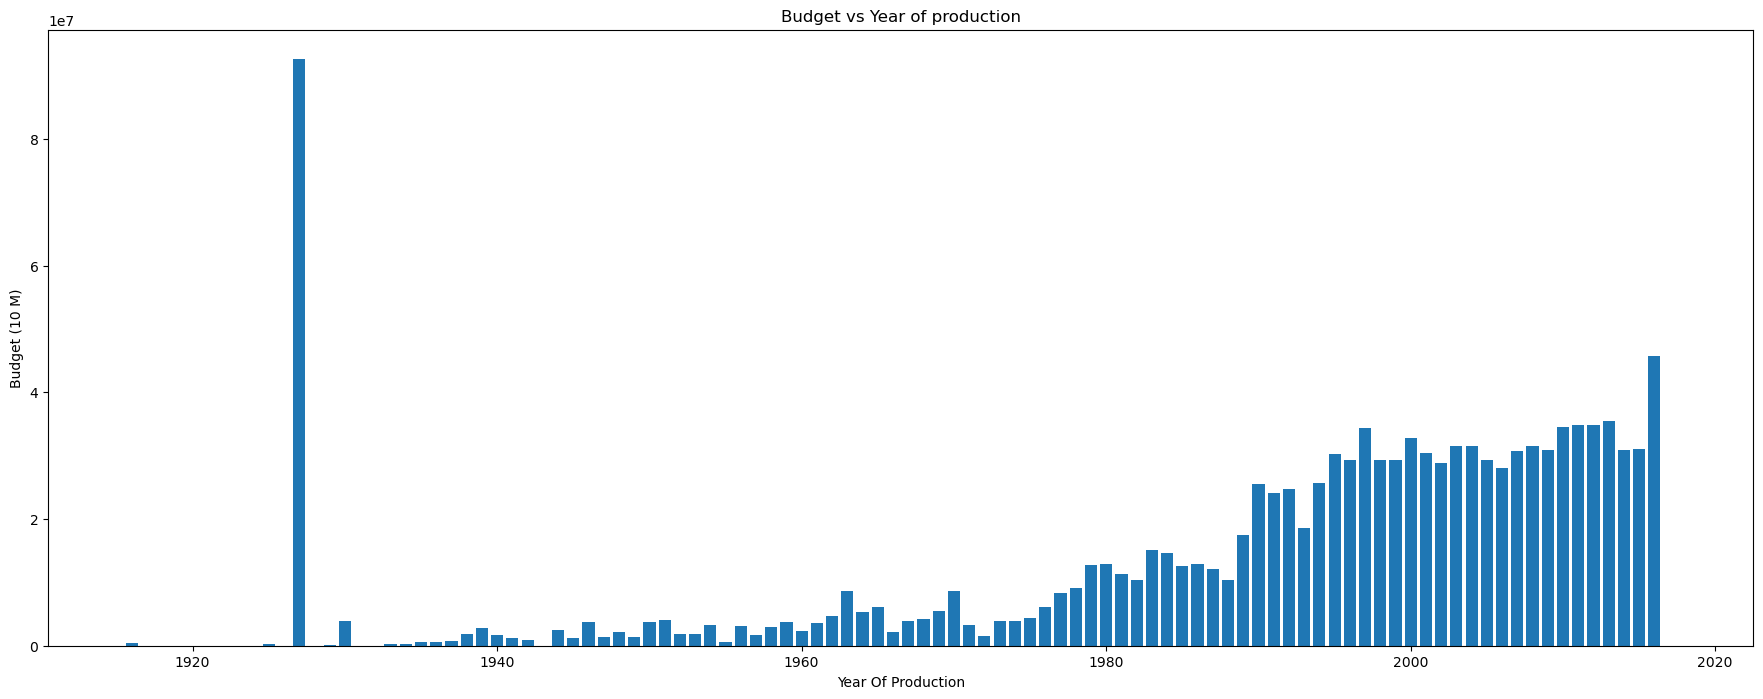

In [304]:
bar_pltot(y4 , 'year' , 'mean_budget' , 'tab:blue' ,'Year Of Production' , 'Budget (10 M)', 'Budget vs Year of production')

# Conclusion: Budget Increased over years we need to check if popularity increased as well to check if it's related or not:

## Popularity over the years

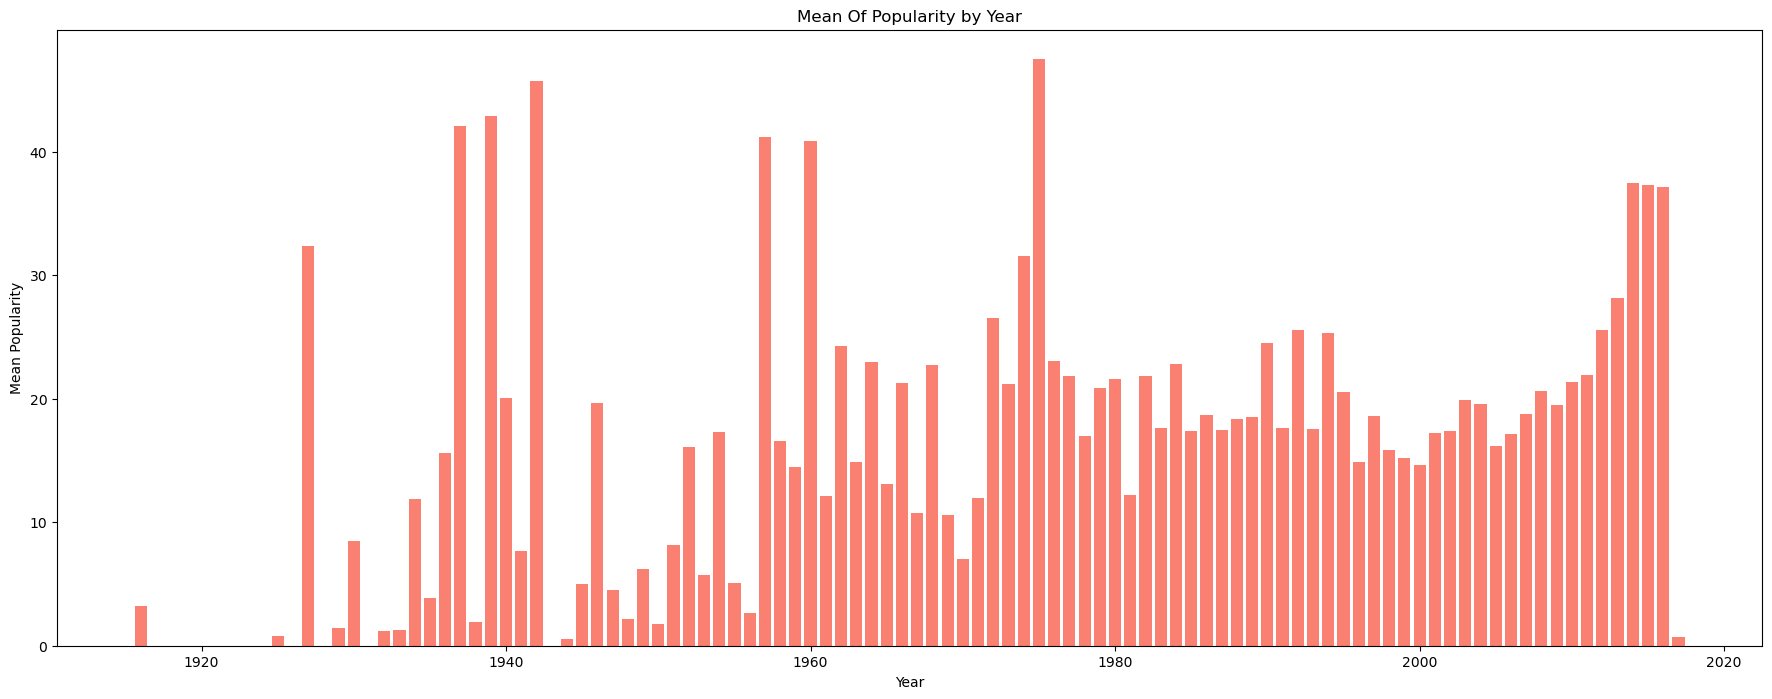

In [312]:
bar_pltot(y4 , 'year' , 'mean_popularity' , 'salmon' ,'Year' , 'Mean Popularity', 'Mean Of Popularity by Year')

## Conclusion :
1- Popularity of movies is the period between 1930-1960 at the peak while on the other hand budget was at it's lowest at these times 


2- after 1960 the budget started to increase same as the popularity

# Final conclusion : 
The budget invested in the movies is not the main factor for movies to be popular, it could be other factors like genres and production companies that need to be studied later.


### For Dataset we have some points and limitations :
1- the data for other languages other than english is not enough and rare which may affect our conclusion 

2- The data after 2017 is not availabe which also may affect the final result and the final conclusion

On the other hand the data for each movie collected seems to be accurate and cover all needed points. Data was cleaned and there no Null values which saves time and offer better implemntation

# Future Studies for budget vs popularity :

1- Study budget and popularity according to geners and production companies